# Statistical tests. Evaluating significance of the presence of different patient sets in the training split

In [45]:
import os
import json
import pandas as pd
from scipy.stats import wilcoxon

In [19]:
folder_1 = "../logs/watt_20210616152235" # Training with HCM + X sets
folder_2 = "../logs/watt_20210617132158" # Training with HCM + X + Hebron sets

raw_folder = "../../LVNC_dataset/raw_dataset/"

In [26]:
test_results_1 = json.load(open(os.path.join(folder_1, "test", "output", "_result.json")))
df_test_1 = pd.DataFrame(test_results_1["per_slice"])
test_results_2 = json.load(open(os.path.join(folder_2, "test", "output", "_result.json")))
df_test_2 = pd.DataFrame(test_results_2["per_slice"])

In [27]:
df = pd.read_pickle(os.path.join(raw_folder, "df_info.pick"))
df_hebron = df[df["set"]=="Hebron"]

Now we have to keep just the results for slices contained in the Hebron set.

In [31]:
df_all_1 = df_hebron.merge(df_test_1, on=["patient", "slice"])
df_all_2 = df_hebron.merge(df_test_2, on=["patient", "slice"])

In [33]:
df_all_1["pta_difference"].mean()

6.190647042315939

In [43]:
df_all_1["pta_difference"].std()

5.336821685428226

In [32]:
df_all_2["pta_difference"].mean()

4.9734422020290205

In [44]:
df_all_2["pta_difference"].std()

4.7048153314515515

In [41]:
df_all = df_all_1.merge(df_all_2, on=["patient", "slice", "set", "reversed", "pta_qlvthc", "pta_class_map", "score"])

<AxesSubplot:>

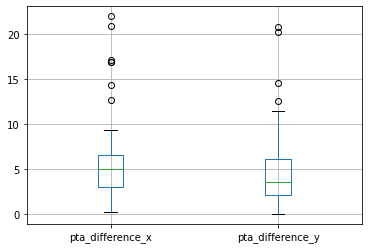

In [42]:
df_all.boxplot(["pta_difference_x", "pta_difference_y"])

In [48]:
wilcoxon(df_all_1["pta_difference"], df_all_2["pta_difference"], alternative="greater")

WilcoxonResult(statistic=788.0, pvalue=0.00342520523915432)

In [51]:
wilcoxon(df_all_2["pta_difference"], df_all_1["pta_difference"], alternative="greater")

WilcoxonResult(statistic=293.0, pvalue=0.9965747947608457)